In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [297]:
class Quaternion:
    def __init__(self, x = 0, y = 0, z = 0, s = 0):
        self.mean = (s**2 + x**2 + y**2 + z**2)**0.5
        self.s,self.x,self.y,self.z = s,x,y,z
        self.RotationMatrix()
        
    def Q2E(self, x, y, z, s = 0):
        self.__init__(x,y,z,s)
        return self
    
    def E2Q(self, phi, theta, Phi):
        self.phi,self.theta,self.Phi = phi, theta, Phi
        self.s = np.cos(phi/2)*np.cos(theta/2)*np.cos(Phi/2) + np.sin(phi/2)*np.sin(theta/2)*np.sin(Phi/2)
        self.x = np.sin(phi/2)*np.cos(theta/2)*np.cos(Phi/2) - np.cos(phi/2)*np.sin(theta/2)*np.sin(Phi/2)
        self.y = np.cos(phi/2)*np.sin(theta/2)*np.cos(Phi/2) + np.sin(phi/2)*np.cos(theta/2)*np.sin(Phi/2)
        self.z = np.cos(phi/2)*np.cos(theta/2)*np.sin(Phi/2) - np.sin(phi/2)*np.sin(theta/2)*np.cos(Phi/2)
        self.RotationMatrix()
        return self
    
    def RotationMatrix(self):
        s,x,y,z = self.s,self.x,self.y,self.z
        mean = (s**2 + x**2 + y**2 + z**2)**0.5
        if mean == 0:
            mean = 1
        s,x,y,z = s/mean,x/mean,y/mean,z/mean
        self.phi = np.arctan2(2*(s*x + y*z), 1 - 2*(x**2 + y**2))
        self.theta = np.arcsin(2*(s*y - z*x))
        self.Phi = np.arctan2(2*(s*z + x*y), 1 - 2*(y**2 + z**2))
        
        self.R = np.array([[1-2*(y**2 + z**2),     2 * (x*y - s*z),     2 * (s*y + x*z)],
                           [  2 * (x*y + s*z), 1 - 2*(x**2 + z**2),     2 * (y*z - s*x)],
                           [  2 * (x*z - s*y),     2 * (s*x + y*z), 1 - 2*(x**2 + y**2)]])
        
#     def Rotate(self, phi, theta, Phi):
#         y = self*Quaternion().E2Q(phi, theta, Phi)
#         return Quaternion(*list(y.reshape(-1)))
#     def dot_mul(self, other):
#         Q1 = self
#         Q2 = other
#         return Q1.s*Q2.s + Q1.x*Q2.x + Q1.y*Q2.y + Q1.z*Q2.z
        
    def mul(self,other):
        sa,xa,ya,za = self.s, self.x, self.y, self.z
        sb,xb,yb,zb = other.s, other.x,other.y,other.z
        s = sa*sb - xa*xb - ya*yb - za*zb
        x = sa*xb + sb*xa + ya*zb - yb*za
        y = sa*yb + sb*ya + za*xb - zb*xa
        z = sa*zb + sb*za + xa*yb - xb*ya
        return Quaternion(x,y,z,s)
        
    def inverse(self):
        return Quaternion(-self.x, -self.y, -self.z, self.s)
        
    def Rotate(self, vector):
        return vector.mul(self).mul(vector.inverse())
        
        
    def __add__(self, vector):
        return Quaternion(self.x+vector.x,self.y+vector.y,self.z+vector.z,self.s+vector.s)
    
    def __mul__(self, c):
        self.x, self.y, self.z, self.s = self.x*c, self.y*c, self.z*c, self.s*c
        return self
        
    def __repr__(self):
        return '({s},{x},{y},{z})--({phi},{theta},{Phi})'.format(s = self.s, x = self.x, y = self.y, z = self.z, phi = self.phi, theta = self.theta, Phi = self.Phi)

In [298]:
def getRotateQuaternion(Q1,Q2):
    cosTheta = (Q1.s*Q2.s + Q1.x*Q2.x + Q1.y*Q2.y + Q1.z*Q2.z)/(Q1.mean*Q2.mean)
    Theta = np.arccos(cosTheta)
    x = Q1.y*Q2.z - Q2.y*Q1.z
    y = Q1.z*Q2.x - Q2.z*Q1.x
    z = Q1.x*Q2.y - Q2.x*Q1.y
    mean = (x**2 + y**2 + z**2)**0.5
    vector = Quaternion(np.sin(Theta/2)*x/mean, np.sin(Theta/2)*y/mean, np.sin(Theta/2)*z/mean, np.cos(Theta/2))
    return vector

In [299]:
g_all = [-4.225172, -0.7840731, 8.8149605]
g = Quaternion(0,0,9.8)
gx = g_all[0]
gy = g_all[1]
gz = g_all[2]
g_v = Quaternion(-4.225172, -0.7840731, 8.8149605)
o = Quaternion()
p1 = Quaternion(-5,-5,0)
p2 = Quaternion(-5,5,0)
p3 = Quaternion(5,5,0)
p4 = Quaternion(5,-5,0)

In [301]:
r = getRotateQuaternion(g,g_v)
p1.Rotate(r)

(-2.220446049250313e-16,-4.42050620776767,-4.892462249085633,-2.554004308602367)--(2.546975221473512,-0.4685574424453449,1.818051215358938)

In [302]:
p1_ = p1.Rotate(r)
p2_ = p2.Rotate(r)
p3_ = p3.Rotate(r)
p4_ = p4.Rotate(r)

(-10.0, 10.0)

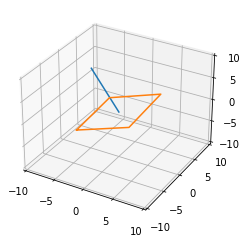

In [303]:
fig = plt.figure()
# ax = fig.gca(projection='3d')
ax = plt.axes(projection='3d')
ax.plot([0,gx], [0,gy], [0,gz], label='parametric curve')
ax.plot([p1_.x, p2_.x, p3_.x, p4_.x, p1_.x],[p1_.y, p2_.y, p3_.y, p4_.y, p1_.y],[p1_.z, p2_.z, p3_.z, p4_.z, p1_.z],
        label='parametric curve')


ax.set_xlim3d(-10,10)
ax.set_ylim3d(-10,10)
ax.set_zlim3d(-10,10)